In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 
from sklearn.preprocessing import OneHotEncoder

In [2]:
pd.set_option('display.max_columns', None)

df = pd.read_csv('train.csv')
df.head(20)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,

In [3]:
print (len(df.columns))
print (df.columns)

81
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDr

In [4]:
missing_values = df.isnull().sum()
# Pip Install Jinja2 module first
missing_values[missing_values > 0].to_frame().style.background_gradient(cmap='viridis')

,0
LotFrontage,259
Alley,1369
MasVnrType,872
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


In [5]:
# There are a total of 1460 rows and 81 columns
df.shape

(1460, 81)

In [6]:
# Linear Feet of Street connected to the Property (Numerical Variable with 259 missing values) -- NA assumes there is 0 Linear Feet of Street (Fill with 0) 
df['LotFrontage'].value_counts() 


LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: count, Length: 110, dtype: int64

In [7]:
# This returns Gravel / Pavement and has 1306 missing values. Drop this variable
df['Alley'].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [8]:
# Masonry Veneer Type -  872 missing values. None means No Type (Fill with NT - None then One Hot Encode]
df['MasVnrType'].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


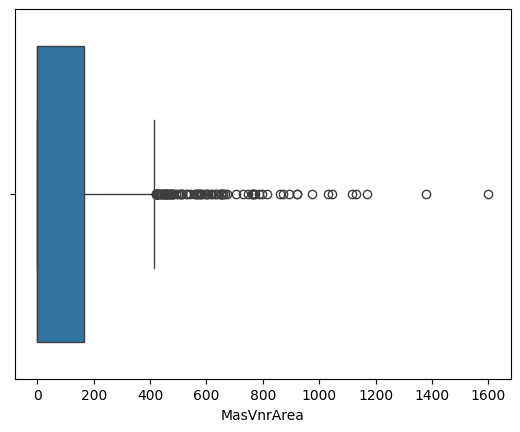

In [9]:
# MasVnrArea refers to Masonry Veneer Area in Square Feet (Has 8 Missing Values. Fill 0)
sns.boxplot(df, x='MasVnrArea')
print (df['MasVnrArea'].describe())

In [10]:
# This refers to Evaluation of Height of the Basement which returns Categorical Variable. -- NA means No Basement (Fill NB -- No Basement and One Hot Encode, 37 Missing Values) 
df['BsmtQual'].value_counts() 

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

In [11]:
# Evaluates general condition of basement -- NA means No Basement (Fill NB -- No Basement and One Hot Encode, 37 Missing Values) 
df['BsmtCond'].value_counts() 

BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64

In [12]:
# Refers to Walkouts or Garden Level Walls. -- NA means No Basement (Fill NB -- No Basement and One Hot Encode, 38 Missing Values)
df['BsmtExposure'].value_counts() 

BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64

In [13]:
# Rating of Basement Finished Area. Missing Values are because there are no Basements. (Fill NB -- No Basement and One Hot Encode. 37 Missing Values)
df['BsmtFinType1'].value_counts() 

BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64

In [14]:
# Rating of Basement Finished Area (If multiple types) -- NA means No Basement. (Fill NB -- No Basement and One Hot Encode, 38 Missing Values)
df['BsmtFinType2'].value_counts() 

BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64

In [15]:
# Fireplace Quality -- NA means No Fireplace (Fill with NF - No Fireplace and One Hot Encode, 690 missing values)
df['FireplaceQu'].value_counts() 

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [16]:
# Garage Location -- NA means No Garage (Fill with NG - No Garage and One Hot Encode, 81 missing values)
df['GarageType'].value_counts()

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

In [17]:
# Year that Garage was built. -- NA means No Year bc No Garage. Can we just fill with 0? Or delete the rows ? 
df['GarageYrBlt'].value_counts() 

GarageYrBlt
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: count, Length: 97, dtype: int64

In [18]:
# Interior Finish of the Garage. NA means No Garage. (Fill with NG - No Garage and One Hot Encode, 81 Missing Values)
df['GarageFinish'].value_counts() 

GarageFinish
Unf    605
RFn    422
Fin    352
Name: count, dtype: int64

In [19]:
# Garage Quality -- NA means No Garage (Fill with NG - No Garage and One Hot Encode, 81 missing values)
df['GarageQual'].value_counts() 

GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

In [20]:
# Garage Condition -- NA means No Garage (Fill with NG - No Garage and One Hot Encode, 81 Missing Values)
df['GarageCond'].value_counts() 

GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64

In [21]:
# Pool Quality -- NA means No Pool (1453 Missing Values, Consider removing if not significant. Otherwise Fill with NP - No Pool, One Hot Encode)
df['PoolQC'].value_counts() 

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64

In [22]:
# Fence Quality -- NA means No Fence (1179 Missing Values, Consider removing if not significant. Otherwise Fill with NF - No Fence, One Hot Encode)
df['Fence'].value_counts() 

Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64

In [23]:
# Miscellaneous Features not covered in other categories. (1406 Missing Values) Consider removing if not significant. Otherwise Fill with NF - No Features.
df['MiscFeature'].value_counts() 

MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: count, dtype: int64

In [24]:
# df[df['Electrical'] == 'NA']
df['Electrical'].value_counts()

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [25]:
df['Alley'].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [26]:
df['SaleType'].value_counts()

SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64

In [27]:
df['SaleCondition'].value_counts()

SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64

In [28]:
categorical_features = df[['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
                                     'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
                                     'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                                     'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 
                                     'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']]

categorical_features

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,2003.0,RFn,TA,TA,Y,NaN,NaN,NaN,2,2008,WD,Normal
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,1976.0,RFn,TA,TA,Y,NaN,NaN,NaN,5,2007,WD,Normal
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,2001.0,RFn,TA,TA,Y,NaN,NaN,NaN,9,2008,WD,Normal
3,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,1998.0,Unf,TA,TA,Y,NaN,NaN,NaN,2,2006,WD,Abnorml
4,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,2000.0,RFn,TA,TA,Y,NaN,NaN,NaN,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,1999.0,RFn,TA,TA,Y,NaN,NaN,NaN,8,2007,WD,Normal
1456,20,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,1978.0,Unf,TA,TA,Y,NaN,MnPrv,NaN,2,2010,WD,Normal
1457,70,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,1941.0,RFn,TA,TA,Y,NaN,GdPrv,Shed,5,2010,WD,Normal
1458,20,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,NaN,Attchd,1950.0,Unf,TA,TA,Y,NaN,NaN,NaN,4,2010,WD,Normal


In [29]:
numerical_features = df.drop(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
                                     'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
                                     'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                                     'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 
                                     'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'], axis=1)

numerical_features

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1,65.0,8450,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,208500
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,181500
2,3,68.0,11250,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,223500
3,4,60.0,9550,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,140000
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,2,460,0,40,0,0,0,0,0,175000
1456,1457,85.0,13175,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,2,500,349,0,0,0,0,0,0,210000
1457,1458,66.0,9042,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1,252,0,60,0,0,0,0,2500,266500
1458,1459,68.0,9717,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1,240,366,0,112,0,0,0,0,142125


In [53]:
from sklearn.preprocessing import LabelEncoder
def fill_missing_values(train_df): 
    categorical_features = train_df[['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
                                     'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
                                     'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                                     'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 
                                     'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']]
    # categorical_features = train_df.select_dtypes(include=['object', 'bool'])
    categorical_feature_columns = categorical_features.astype('str').columns
    numerical_features = train_df.drop(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
                                     'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
                                     'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                                     'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 
                                     'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'], axis=1)
    # numerical_features = train_df.select_dtypes(include=['int', 'float']).columns
    
    
    # fill missing values with MODE for categorical features
    for col in categorical_feature_columns:
        # train_df[col].fillna(train_df[col].mode()[0], inplace=True)
        train_df[col].fillna(train_df[col].mode()[0], inplace=True)

        
    # fill missing values with MEDIAN for numerical features
    for col in numerical_features:
        # train_df[col].fillna(train_df[col].median(), inplace=True)
        train_df[col].fillna(train_df[col].median(), inplace=True)
        
    return train_df



train_df = fill_missing_values(df)

categorical_features = train_df[['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
                                     'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
                                     'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                                     'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 
                                     'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']]

numerical_features = train_df.drop(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
                                     'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
                                     'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                                     'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 
                                     'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'], axis=1)
le = LabelEncoder()
ohe = OneHotEncoder() 
# apply label encoder on Training categorical feature columns
categorical_data = categorical_features.apply(lambda col: le.fit_transform(col))

trained_filled_data = pd.concat([numerical_features, categorical_data], axis=1)
trained_filled_data


C:\Users\guojiefoo\AppData\Local\Temp\ipykernel_3112\4275181413.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(train_df[col].mode()[0], inplace=True)
C:\Users\guojiefoo\AppData\Local\Temp\ipykernel_3112\4275181413.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,1,65.0,8450,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,208500,5,3,1,0,3,3,0,4,0,5,2,2,0,5,6,4,104,53,1,1,12,13,1,2,4,2,2,3,3,2,5,1,0,1,4,2,6,2,1,89,1,4,4,2,2,2,2,1,2,8,4
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,181500,0,3,1,0,3,3,0,2,0,24,1,2,0,2,5,7,77,26,1,1,8,8,1,3,4,1,2,3,1,0,5,1,0,1,4,3,6,4,1,62,1,4,4,2,2,2,2,4,1,8,4
2,3,68.0,11250,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,223500,5,3,1,0,0,3,0,4,0,5,2,2,0,5,6,4,102,52,1,1,12,13,1,2,4,2,2,3,2,2,5,1,0,1,4,2,6,4,1,87,1,4,4,2,2,2,2,8,2,8,4
3,4,60.0,9550,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,140000,6,3,1,0,0,3,0,0,0,6,2,2,0,5,6,4,19,20,1,1,13,15,1,3,4,0,3,1,3,0,5,1,2,1,4,2,6,2,5,84,2,4,4,2,2,2,2,1,0,8,0
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,250000,5,3,1,0,0,3,0,2,0,15,2,2,0,5,7,4,101,50,1,1,12,13,1,2,4,2,2,3,0,2,5,1,0,1,4,2,6,4,1,86,1,4,4,2,2,2,2,11,2,8,4
5,6,85.0,14115,0.0,732,0,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,2,480,40,30,0,320,0,0,700,143000,4,3,1,0,0,3,0,4,0,11,2,2,0,0,4,4,94,45,1,1,12,13,1,3,4,5,2,3,3,2,5,1,0,1,4,3,6,2,1,79,2,4,4,2,2,2,2,9,3,8,4
6,7,75.0,10084,186.0,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2,636,255,57,0,0,0,0,0,307000,0,3,1,0,3,3,0,4,0,21,2,2,0,2,7,4,105,55,1,1,12,13,2,2,4,2,0,3,0,2,5,1,0,1,4,2,6,2,1,90,1,4,4,2,2,2,2,7,1,8,4
7,8,69.0,10382,240.0,859,32,216,1107,1107,983,0,2090,1,0,2,1,3,1,7,2,2,484,235,204,228,0,0,0,350,200000,5,3,1,0,0,3,0,0,0,14,4,2,0,5,6,5,74,23,1,1,6,6,2,3,4,1,2,3,2,0,1,1,0,1,4,3,6,4,1,59,1,4,4,2,2,2,2,10,3,8,4
8,9,51.0,6120,0.0,0,0,952,952,1022,752,0,1774,0,0,2,0,2,2,8,2,2,468,90,0,205,0,0,0,0,129900,4,4,1,0,3,3,0,4,0,17,0,2,0,0,6,4,35,0,1,1,3,15,1,3,4,0,3,3,3,5,5,1,2,1,1,3,2,4,5,19,2,1,4,2,2,2,2,3,2,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [54]:
missing_values = trained_filled_data.isnull().sum()
# Pip Install Jinja2 module first
missing_values[missing_values > 0].to_frame().style.background_gradient(cmap='viridis')

,0


In [32]:
# from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
# # from sklearn.compose import ColumnTransformer

# le = LabelEncoder()
# # oe = OrdinalEncoder()
# # # categorical_features = []
# # # for col in categorical_data.columns: 
# # #     if type(col) == 'float': 
# # #         categorical_features.append(col.astype('str'))
        

# # categorical_data = categorical_data.astype('str')

# # # Update the DataFrame to ensure categorical columns are strings
# # df[categorical_data.columns] = categorical_data

# # # numerical_features = numeric_data.astype('int')
# # categorical_features_list = categorical_data.columns.to_list()
# # numerical_features_list = numeric_data.columns.to_list()

# # columns = categorical_features_list + numerical_features_list
# # columns_transformer = ColumnTransformer([
# #     ('encoding', OrdinalEncoder(), categorical_features_list),
# #     ('scaling', StandardScaler(), numerical_features_list)
# # ])

# # encoded_train = columns_transformer.fit_transform(df)

# # apply label encoder on categorical feature columns
# categorical_data = categorical_data.apply(lambda col: le.fit_transform(col))

# # encoded_df = pd.DataFrame(encoded_train, columns=columns)

# # encoded_df.head() 

In [55]:
# filled_data = pd.concat([numeric_data, categorical_data], axis=1)
# print (filled_data.columns)
trained_filled_data['Total Bathrooms'] = trained_filled_data['FullBath'] + 0.5 * trained_filled_data['HalfBath'] + trained_filled_data['BsmtFullBath'] + 0.5 * trained_filled_data['BsmtHalfBath']
trained_filled_data['Total Square Feet'] = trained_filled_data['TotalBsmtSF'] + trained_filled_data['GrLivArea'] + trained_filled_data['GarageArea'] + trained_filled_data['WoodDeckSF'] + trained_filled_data['OpenPorchSF'] + trained_filled_data['EnclosedPorch'] + trained_filled_data['3SsnPorch'] + trained_filled_data['ScreenPorch'] + trained_filled_data['PoolArea']
trained_filled_data['Overall House Age'] = (df['YrSold']) - (df['YearBuilt'])
trained_filled_data['Rebirthed House Age'] = (df['YrSold']) - (df['YearRemodAdd'])
trained_filled_data
# filled_data['Total Bathrooms']

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,Total Bathrooms,Total Square Feet,Overall House Age,Rebirthed House Age
0,1,65.0,8450,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,208500,5,3,1,0,3,3,0,4,0,5,2,2,0,5,6,4,104,53,1,1,12,13,1,2,4,2,2,3,3,2,5,1,0,1,4,2,6,2,1,89,1,4,4,2,2,2,2,1,2,8,4,3.5,3175,5,5
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,181500,0,3,1,0,3,3,0,2,0,24,1,2,0,2,5,7,77,26,1,1,8,8,1,3,4,1,2,3,1,0,5,1,0,1,4,3,6,4,1,62,1,4,4,2,2,2,2,4,1,8,4,2.5,3282,31,31
2,3,68.0,11250,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,223500,5,3,1,0,0,3,0,4,0,5,2,2,0,5,6,4,102,52,1,1,12,13,1,2,4,2,2,3,2,2,5,1,0,1,4,2,6,4,1,87,1,4,4,2,2,2,2,8,2,8,4,3.5,3356,7,6
3,4,60.0,9550,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,140000,6,3,1,0,0,3,0,0,0,6,2,2,0,5,6,4,19,20,1,1,13,15,1,3,4,0,3,1,3,0,5,1,2,1,4,2,6,2,5,84,2,4,4,2,2,2,2,1,0,8,0,2.0,3422,91,36
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,250000,5,3,1,0,0,3,0,2,0,15,2,2,0,5,7,4,101,50,1,1,12,13,1,2,4,2,2,3,0,2,5,1,0,1,4,2,6,4,1,86,1,4,4,2,2,2,2,11,2,8,4,3.5,4455,8,8
5,6,85.0,14115,0.0,732,0,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,2,480,40,30,0,320,0,0,700,143000,4,3,1,0,0,3,0,4,0,11,2,2,0,0,4,4,94,45,1,1,12,13,1,3,4,5,2,3,3,2,5,1,0,1,4,3,6,2,1,79,2,4,4,2,2,2,2,9,3,8,4,2.5,3028,16,14
6,7,75.0,10084,186.0,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2,636,255,57,0,0,0,0,0,307000,0,3,1,0,3,3,0,4,0,21,2,2,0,2,7,4,105,55,1,1,12,13,2,2,4,2,0,3,0,2,5,1,0,1,4,2,6,2,1,90,1,4,4,2,2,2,2,7,1,8,4,3.0,4328,3,2
7,8,69.0,10382,240.0,859,32,216,1107,1107,983,0,2090,1,0,2,1,3,1,7,2,2,484,235,204,228,0,0,0,350,200000,5,3,1,0,0,3,0,0,0,14,4,2,0,5,6,5,74,23,1,1,6,6,2,3,4,1,2,3,2,0,1,1,0,1,4,3,6,4,1,59,1,4,4,2,2,2,2,10,3,8,4,3.5,4348,36,36
8,9,51.0,6120,0.0,0,0,952,952,1022,752,0,1774,0,0,2,0,2,2,8,2,2,468,90,0,205,0,0,0,0,129900,4,4,1,0,3,3,0,4,0,17,0,2,0,0,6,4,35,0,1,1,3,15,1,3,4,0,3,3,3,5,5,1,2,1,1,3,2,4,5,19,2,1,4,2,2,2,2,3,2,8,0,2.0,3489,77,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [56]:
# Set Display Options to show all rows and columns 
pd.set_option('display.max_rows', False)
pd.set_option('display.max_columns', False) 

correlation_matrix = trained_filled_data.corr(method='pearson', numeric_only = True)
correlation_matrix

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,Total Bathrooms,Total Square Feet,Overall House Age,Rebirthed House Age
Id,1.000000,-0.009921,-0.033226,-0.051071,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,-0.021917,0.018745,-0.006096,0.008916,-0.001658,0.032122,-0.019659,0.013324,0.049756,0.005847,-0.013735,...,0.012609,-0.011313,-0.021998,0.038675,-0.022562,-0.034694,-0.042847,0.036520,0.001689,0.029826,0.008514,0.051070,0.006762,-0.024613,0.014204,0.045159,0.042120,0.002157,0.009821,0.037632,-0.004432,-0.001064,0.004644,0.000195,-0.004117,-0.011390,-0.003230,-0.018025,0.005971,-0.011344,-0.012923,0.005687,0.021172,0.000712,0.019773,-0.005806,0.004540,-0.001170,0.012724,0.022049
LotFrontage,-0.009921,1.000000,0.304522,0.178469,0.214367,0.042463,0.124098,0.363472,0.413773,0.072388,0.037469,0.368007,0.090343,-0.006979,0.180534,0.047222,0.236840,-0.004905,0.320518,0.233221,0.269539,0.323511,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.334771,-0.308683,-0.105961,-0.037349,-0.170656,-0.138877,-0.076080,-0.001027,-0.177821,0.065603,0.084901,...,-0.053281,0.117151,0.083348,0.153999,0.081277,0.075455,0.099515,0.075228,-0.184120,0.048300,0.098418,-0.169603,0.050604,-0.123629,-0.023263,-0.025981,-0.020325,-0.081081,0.067350,0.059572,-0.190232,0.030114,0.056479,-0.216403,0.037529,-0.211125,0.049935,0.042740,0.088121,-0.153087,-0.035517,0.008363,0.010451,0.006380,-0.031412,0.058857,0.200381,0.435070,-0.116223,-0.082957
LotArea,-0.033226,0.304522,1.000000,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843,-0.132505,-0.034452,-0.197131,-0.077747,-0.165315,-0.149083,0.010123,-0.121161,0.436868,0.044569,...,-0.005636,0.012386,0.013788,0.077054,0.149837,0.004256,-0.003930,-0.002789,-0.057275,0.015160,-0.011081,-0.065150,0.012366,-0.141043,-0.061880,-0.068954,0.028158,0.004212,0.049755,0.043856,-0.057018,-0.022317,0.069154,-0.116799,-0.043600,-0.116326,0.017551,0.028106,0.015134,-0.038048,0.005196,-0.009333,0.001205,-0.014261,0.012292,0.034169,0.204764,0.311042,-0.014832,-0.014709
MasVnrArea,-0.051071,0.178469,0.103321,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,0.472614,0.031444,-0.062830,0.017108,0.025224,-0.106178,0.048274,0.063452,-0.031639,-0.021083,0.118035,...,-0.125694,0.313218,0.176529,0.248961,0.035277,0.023587,0.001586,0.190826,-0.353094,0.069631,0.174586,-0.317428,0.064748,-0.126511,-0.075420,0.046868,-0.048383,-0.142310,0.126409,0.110868,-0.257220,0.087916,0.059955,-0.156608,0.208540,-0.269646,0.105904,0.067709,0.144103,0.015397,0.016008,0.030491,-0.006723,-0.008317,-0.055132,0.086638,0.314248,0.449283,-0.311479,-0.177105
BsmtFinSF1,-0.005024,0.214367,0.214103,0.261256,1.000000,-0.050117,-0.4952

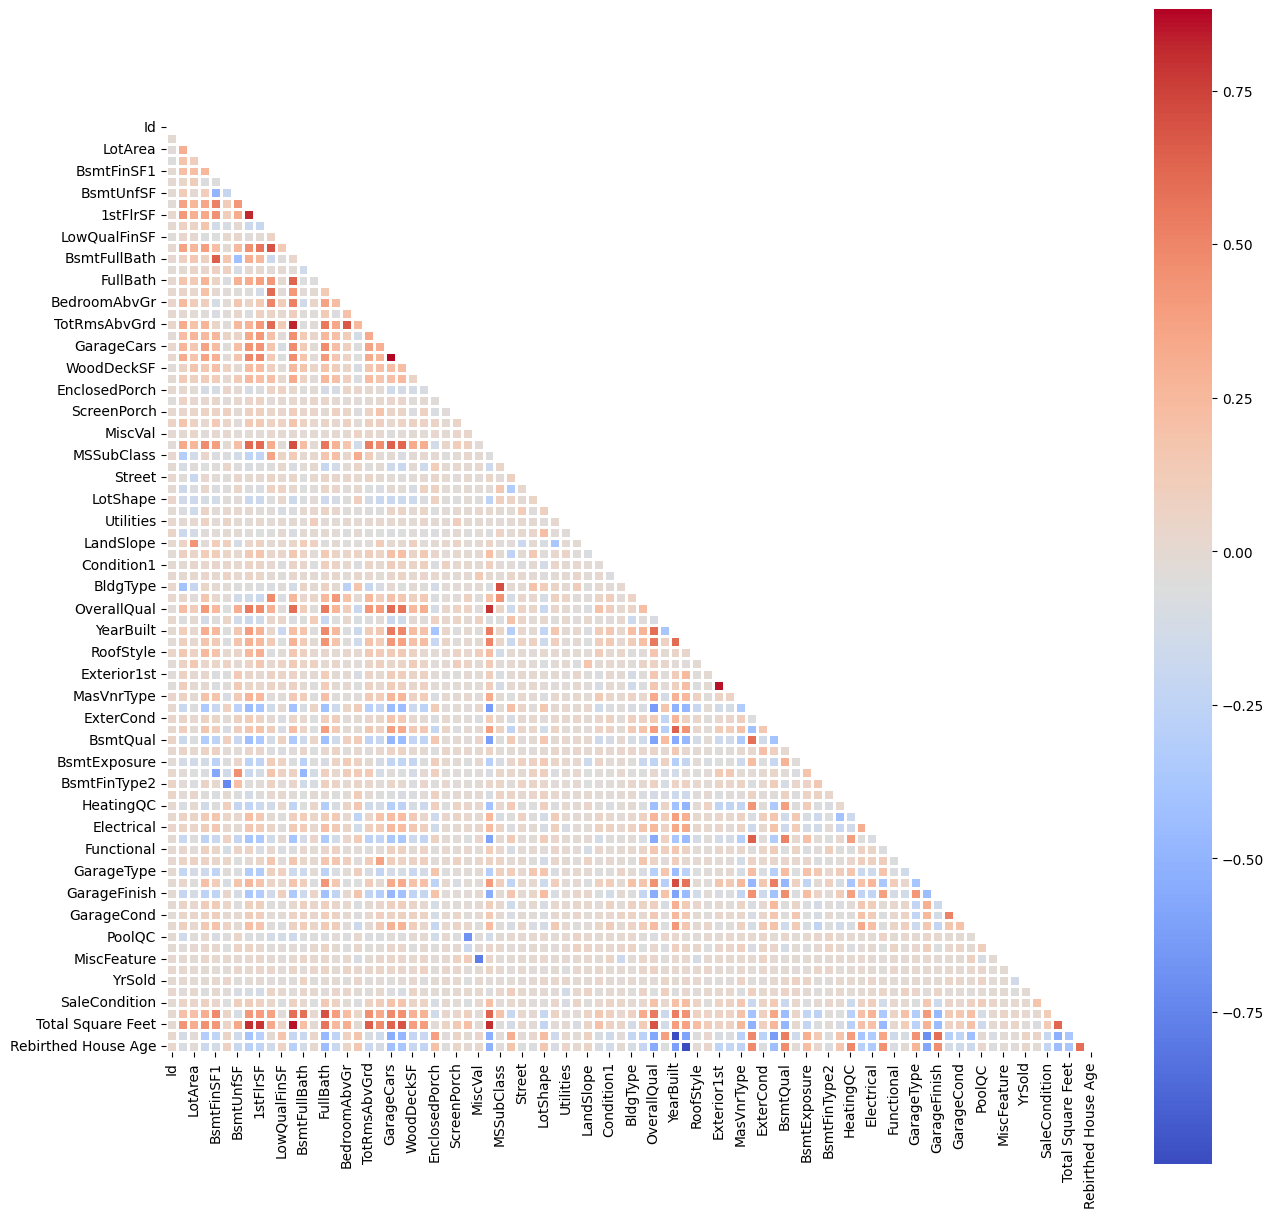

In [57]:
# Create a Mask to filter out top half of correlation matrix
mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', square=True, mask=mask, linewidths=1.0)

plt.show() 

In [58]:
pd.set_option('display.max_columns', None)
trained_filled_data

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,Total Bathrooms,Total Square Feet,Overall House Age,Rebirthed House Age
0,1,65.0,8450,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,208500,5,3,1,0,3,3,0,4,0,5,2,2,0,5,6,4,104,53,1,1,12,13,1,2,4,2,2,3,3,2,5,1,0,1,4,2,6,2,1,89,1,4,4,2,2,2,2,1,2,8,4,3.5,3175,5,5
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,181500,0,3,1,0,3,3,0,2,0,24,1,2,0,2,5,7,77,26,1,1,8,8,1,3,4,1,2,3,1,0,5,1,0,1,4,3,6,4,1,62,1,4,4,2,2,2,2,4,1,8,4,2.5,3282,31,31
2,3,68.0,11250,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,223500,5,3,1,0,0,3,0,4,0,5,2,2,0,5,6,4,102,52,1,1,12,13,1,2,4,2,2,3,2,2,5,1,0,1,4,2,6,4,1,87,1,4,4,2,2,2,2,8,2,8,4,3.5,3356,7,6
3,4,60.0,9550,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,140000,6,3,1,0,0,3,0,0,0,6,2,2,0,5,6,4,19,20,1,1,13,15,1,3,4,0,3,1,3,0,5,1,2,1,4,2,6,2,5,84,2,4,4,2,2,2,2,1,0,8,0,2.0,3422,91,36
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,250000,5,3,1,0,0,3,0,2,0,15,2,2,0,5,7,4,101,50,1,1,12,13,1,2,4,2,2,3,0,2,5,1,0,1,4,2,6,4,1,86,1,4,4,2,2,2,2,11,2,8,4,3.5,4455,8,8
5,6,85.0,14115,0.0,732,0,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,2,480,40,30,0,320,0,0,700,143000,4,3,1,0,0,3,0,4,0,11,2,2,0,0,4,4,94,45,1,1,12,13,1,3,4,5,2,3,3,2,5,1,0,1,4,3,6,2,1,79,2,4,4,2,2,2,2,9,3,8,4,2.5,3028,16,14
6,7,75.0,10084,186.0,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2,636,255,57,0,0,0,0,0,307000,0,3,1,0,3,3,0,4,0,21,2,2,0,2,7,4,105,55,1,1,12,13,2,2,4,2,0,3,0,2,5,1,0,1,4,2,6,2,1,90,1,4,4,2,2,2,2,7,1,8,4,3.0,4328,3,2
7,8,69.0,10382,240.0,859,32,216,1107,1107,983,0,2090,1,0,2,1,3,1,7,2,2,484,235,204,228,0,0,0,350,200000,5,3,1,0,0,3,0,0,0,14,4,2,0,5,6,5,74,23,1,1,6,6,2,3,4,1,2,3,2,0,1,1,0,1,4,3,6,4,1,59,1,4,4,2,2,2,2,10,3,8,4,3.5,4348,36,36
8,9,51.0,6120,0.0,0,0,952,952,1022,752,0,1774,0,0,2,0,2,2,8,2,2,468,90,0,205,0,0,0,0,129900,4,4,1,0,3,3,0,4,0,17,0,2,0,0,6,4,35,0,1,1,3,15,1,3,4,0,3,3,3,5,5,1,2,1,1,3,2,4,5,19,2,1,4,2,2,2,2,3,2,8,0,2.0,3489,77,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [59]:
# [ 'BsmtQual', 'ExterQual','KitchenQual', 
       # 'OverallQual', 'MasVnrArea', 'GrLivArea',
       # 'TotRmsAbvGrd', 'Fireplaces', 'GarageFinish', 'GarageCars', 
       # 'Total Bathrooms', 'Overall House Age','Rebirthed House Age', 'Total Square Feet']

# Training Data Parameters
y = trained_filled_data['SalePrice']
X = trained_filled_data.drop(['SalePrice', 'Id', 'Fence', 'MiscFeature'], axis=1)
print (X.shape)
print (y.shape)


(1460, 81)
(1460,)


In [60]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, r2_score
from sklearn.metrics import root_mean_squared_error, root_mean_squared_log_error
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [61]:
# Create a VIF DataFrame 
pd.set_option('display.max_rows', False)
pd.set_option('display.max_columns', False) 

vif = pd.DataFrame() 
vif['Feature'] = X.columns 
# Calculate VIF Scores for each feature prior to any preprocessing performed
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# Pip Install tabulate
display(vif.to_string())



c:\Users\guojiefoo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


'                Feature   VIF Factor\n0           LotFrontage     1.777805\n1               LotArea     1.633324\n2            MasVnrArea     1.533783\n3            BsmtFinSF1          inf\n4            BsmtFinSF2          inf\n5             BsmtUnfSF          inf\n6           TotalBsmtSF          inf\n7              1stFlrSF          inf\n8              2ndFlrSF          inf\n9          LowQualFinSF          inf\n10            GrLivArea          inf\n11         BsmtFullBath          inf\n12         BsmtHalfBath          inf\n13             FullBath          inf\n14             HalfBath          inf\n15         BedroomAbvGr     2.696443\n16         KitchenAbvGr     1.831415\n17         TotRmsAbvGrd     5.364202\n18           Fireplaces     1.914784\n19           GarageCars     6.202002\n20           GarageArea          inf\n21           WoodDeckSF          inf\n22          OpenPorchSF          inf\n23        EnclosedPorch          inf\n24            3SsnPorch          inf\n25         

In [62]:
import xgboost as xgb 
from sklearn.metrics import mean_squared_error as MSE
import statsmodels.api as sm
from scipy import stats 

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
results = est.fit()
print (results.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     108.5
Date:                Thu, 18 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:15:56   Log-Likelihood:                -17127.
No. Observations:                1460   AIC:                         3.441e+04
Df Residuals:                    1383   BIC:                         3.482e+04
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 332.2789    

In [63]:
test_df = pd.read_csv('test.csv')
missing_values = test_df.isnull().sum()
# Pip Install Jinja2 module first
missing_values[missing_values > 0].to_frame().style.background_gradient(cmap='viridis')

,0
MSZoning,4
LotFrontage,227
Alley,1352
Utilities,2
Exterior1st,1
Exterior2nd,1
MasVnrType,894
MasVnrArea,15
BsmtQual,44
BsmtCond,45


In [64]:
def fill_missing_values(test_df): 
    # categorical_features = test_df.select_dtypes(include=['object', 'bool'])
    categorical_features = test_df[['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
                                     'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
                                     'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                                     'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 
                                     'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']]
    categorical_feature_columns = categorical_features.astype('str').columns
    numerical_features = test_df.drop(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
                                     'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
                                     'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                                     'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 
                                     'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'], axis=1)
    # categorical_feature_columns = categorical_features.astype('str').columns
    # numerical_features = test_df.select_dtypes(include=['int', 'float']).columns
    
    
    # fill missing values with MODE for categorical features
    for col in categorical_feature_columns:
        # train_df[col].fillna(train_df[col].mode()[0], inplace=True)
        test_df[col].fillna(test_df[col].mode()[0], inplace=True)

        
    # fill missing values with MEDIAN for numerical features
    for col in numerical_features:
        # train_df[col].fillna(train_df[col].median(), inplace=True)
        test_df[col].fillna(test_df[col].median(), inplace=True)
        
    return test_df

X_test = test_df.drop('Id', axis=1)

X_test = fill_missing_values(X_test)

categorical_features = X_test[['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
                                     'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
                                     'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                                     'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 
                                     'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']]

numerical_features = X_test.drop(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
                                     'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
                                     'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                                     'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 
                                     'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'], axis=1)

le = LabelEncoder()
ohe = OneHotEncoder() 

# categorical_data = categorical_features[['MSSubClass', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
#                                          'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageYrBlt','GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MoSold', 'YrSold']]
# apply label encoder on Testijng categorical feature columns
categorical_data = categorical_features.apply(lambda col: le.fit_transform(col))

# # apply one hot encoding on Testing non-ordinal columns 
# ohe_data = categorical_features[['MSZoning','Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
#                                  'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 
#                                  'Foundation', 'Functional', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageFinish', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']]


# ohe_encoder = OneHotEncoder(handle_unknown='error')
# ohe_encoded_data = ohe_encoder.fit_transform(ohe_data)

# ohe_columns = [f'{col}_{cat}' for i, col in enumerate(ohe_data.columns) for cat in ohe_encoder.categories_[i]]

# dense_array = ohe_encoded_data.toarray()
# ohe_df = pd.DataFrame(dense_array, columns=ohe_columns)

test_filled_data = pd.concat([numerical_features, categorical_data], axis=1)
test_filled_data


C:\Users\guojiefoo\AppData\Local\Temp\ipykernel_3112\2772566686.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df[col].fillna(test_df[col].mode()[0], inplace=True)
C:\Users\guojiefoo\AppData\Local\Temp\ipykernel_3112\2772566686.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,80.0,11622,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1.0,730.0,140,0,0,0,120,0,0,0,2,1,0,3,3,0,4,0,12,1,2,0,2,4,5,56,11,1,0,10,12,1,3,4,1,3,3,3,4,3,0,4,1,3,3,6,2,1,46,2,3,4,2,0,2,2,5,4,8,4
1,81.0,14267,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1.0,312.0,393,36,0,0,0,0,12500,0,3,1,0,0,3,0,0,0,12,2,2,0,2,5,5,53,8,3,0,11,13,1,3,4,1,3,3,3,0,5,0,4,1,3,2,6,2,1,43,2,3,4,2,0,2,0,5,4,8,4
2,74.0,13830,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,2.0,482.0,212,34,0,0,0,0,0,5,3,1,0,0,3,0,4,0,8,2,2,0,4,4,4,92,48,1,0,10,12,1,3,4,2,2,3,3,2,5,0,2,1,3,3,6,4,1,82,0,3,4,2,0,2,2,2,4,8,4
3,78.0,9978,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,2.0,470.0,360,36,0,0,0,0,0,5,3,1,0,0,3,0,4,0,8,2,2,0,4,5,5,93,48,1,0,10,12,1,3,4,2,3,3,3,2,5,0,0,1,3,2,6,2,1,83,0,3,4,2,0,2,2,5,4,8,4
4,43.0,5005,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,2.0,506.0,0,82,0,0,144,0,0,11,3,1,0,0,1,0,4,0,22,2,2,4,2,7,4,87,42,1,0,6,6,1,2,4,2,2,3,3,0,5,0,0,1,3,2,6,2,1,77,1,3,4,2,0,2,2,0,4,8,4
5,75.0,10000,0.0,0.0,0.0,763.0,763.0,763,892,0,1655,0.0,0.0,2,1,3,1,7,1,2.0,440.0,157,84,0,0,0,0,0,5,3,1,0,0,3,0,0,0,8,2,2,0,4,5,4,88,44,1,0,6,6,1,3,4,2,2,3,3,5,5,0,2,1,3,3,6,4,1,78,0,3,4,2,0,2,2,3,4,8,4
6,67.0,7980,0.0,935.0,0.0,233.0,1168.0,1187,0,0,1187,1.0,0.0,2,0,3,1,6,0,2.0,420.0,483,21,0,0,0,0,500,0,3,1,0,0,3,0,4,0,8,2,2,0,2,5,6,87,57,1,0,6,6,1,3,2,2,2,3,3,0,5,0,0,1,3,3,6,2,1,77,0,3,4,2,0,0,2,2,4,8,4
7,63.0,8402,0.0,0.0,0.0,789.0,789.0,789,676,0,1465,0.0,0.0,2,1,3,1,7,1,2.0,393.0,0,75,0,0,0,0,0,5,3,1,0,0,3,0,4,0,8,2,2,0,4,5,4,93,48,1,0,10,12,1,3,4,2,2,3,3,5,5,0,2,1,3,3,6,2,1,83,0,3,4,2,0,2,2,4,4,8,4
8,85.0,10176,0.0,637.0,0.0,663.0,1300.0,1341,0,0,1341,1.0,0.0,1,1,2,1,5,1,2.0,506.0,192,0,0,0,0,0,0,0,3,1,0,3,3,0,4,0,8,2,2,0,2,6,4,85,40,1,0,6,6,1,3,4,2,2,3,1,2,5,0,2,1,3,2,6,3,1,75,2,3,4,2,0,2,2,1,4,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [65]:
missing_values = X_test.isnull().sum()
# Pip Install Jinja2 module first
missing_values[missing_values > 0].to_frame().style.background_gradient(cmap='viridis')


,0


In [66]:
test_filled_data['Total Bathrooms'] = test_filled_data['FullBath'] + 0.5 * test_filled_data['HalfBath'] + test_filled_data['BsmtFullBath'] + 0.5 * test_filled_data['BsmtHalfBath']
test_filled_data['Total Square Feet'] = test_filled_data['TotalBsmtSF'] + test_filled_data['GrLivArea'] + test_filled_data['GarageArea'] + test_filled_data['WoodDeckSF'] + test_filled_data['OpenPorchSF'] + test_filled_data['EnclosedPorch'] + test_filled_data['3SsnPorch'] + test_filled_data['ScreenPorch'] + test_filled_data['PoolArea']
test_filled_data['Overall House Age'] = (test_df['YrSold']) - (test_df['YearBuilt'])
test_filled_data['Rebirthed House Age'] = (test_df['YrSold']) - (test_df['YearRemodAdd'])

pd.set_option('display.max_columns', None)
test_filled_data

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,Total Bathrooms,Total Square Feet,Overall House Age,Rebirthed House Age
0,80.0,11622,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1.0,730.0,140,0,0,0,120,0,0,0,2,1,0,3,3,0,4,0,12,1,2,0,2,4,5,56,11,1,0,10,12,1,3,4,1,3,3,3,4,3,0,4,1,3,3,6,2,1,46,2,3,4,2,0,2,2,5,4,8,4,1.0,2768.0,49,49
1,81.0,14267,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1.0,312.0,393,36,0,0,0,0,12500,0,3,1,0,0,3,0,0,0,12,2,2,0,2,5,5,53,8,3,0,11,13,1,3,4,1,3,3,3,0,5,0,4,1,3,2,6,2,1,43,2,3,4,2,0,2,0,5,4,8,4,1.5,3399.0,52,52
2,74.0,13830,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,2.0,482.0,212,34,0,0,0,0,0,5,3,1,0,0,3,0,4,0,8,2,2,0,4,4,4,92,48,1,0,10,12,1,3,4,2,2,3,3,2,5,0,2,1,3,3,6,4,1,82,0,3,4,2,0,2,2,2,4,8,4,2.5,3285.0,13,12
3,78.0,9978,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,2.0,470.0,360,36,0,0,0,0,0,5,3,1,0,0,3,0,4,0,8,2,2,0,4,5,5,93,48,1,0,10,12,1,3,4,2,3,3,3,2,5,0,0,1,3,2,6,2,1,83,0,3,4,2,0,2,2,5,4,8,4,2.5,3396.0,12,12
4,43.0,5005,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,2.0,506.0,0,82,0,0,144,0,0,11,3,1,0,0,1,0,4,0,22,2,2,4,2,7,4,87,42,1,0,6,6,1,2,4,2,2,3,3,0,5,0,0,1,3,2,6,2,1,77,1,3,4,2,0,2,2,0,4,8,4,2.0,3292.0,18,18
5,75.0,10000,0.0,0.0,0.0,763.0,763.0,763,892,0,1655,0.0,0.0,2,1,3,1,7,1,2.0,440.0,157,84,0,0,0,0,0,5,3,1,0,0,3,0,0,0,8,2,2,0,4,5,4,88,44,1,0,6,6,1,3,4,2,2,3,3,5,5,0,2,1,3,3,6,4,1,78,0,3,4,2,0,2,2,3,4,8,4,2.5,3099.0,17,16
6,67.0,7980,0.0,935.0,0.0,233.0,1168.0,1187,0,0,1187,1.0,0.0,2,0,3,1,6,0,2.0,420.0,483,21,0,0,0,0,500,0,3,1,0,0,3,0,4,0,8,2,2,0,2,5,6,87,57,1,0,6,6,1,3,2,2,2,3,3,0,5,0,0,1,3,3,6,2,1,77,0,3,4,2,0,0,2,2,4,8,4,3.0,3279.0,18,3
7,63.0,8402,0.0,0.0,0.0,789.0,789.0,789,676,0,1465,0.0,0.0,2,1,3,1,7,1,2.0,393.0,0,75,0,0,0,0,0,5,3,1,0,0,3,0,4,0,8,2,2,0,4,5,4,93,48,1,0,10,12,1,3,4,2,2,3,3,5,5,0,2,1,3,3,6,2,1,83,0,3,4,2,0,2,2,4,4,8,4,2.5,2722.0,12,12
8,85.0,10176,0.0,637.0,0.0,663.0,1300.0,1341,0,0,1341,1.0,0.0,1,1,2,1,5,1,2.0,506.0,192,0,0,0,0,0,0,0,3,1,0,3,3,0,4,0,8,2,2,0,2,6,4,85,40,1,0,6,6,1,3,4,2,2,3,1,2,5,0,2,1,3,2,6,3,1,75,2,3,4,2,0,2,2,1,4,8,4,2.5,3339.0,20,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [67]:
# Testing Data Parameters
# [ 'BsmtQual','ExterQual','KitchenQual',
#        'OverallQual', 'MasVnrArea', 'GrLivArea',
#        'TotRmsAbvGrd', 'Fireplaces', 'GarageFinish', 'GarageCars', 
#        'Total Bathrooms', 'Overall House Age', 'Rebirthed House Age', 'Total Square Feet']
X_test = test_filled_data.drop(['Fence','MiscFeature'], axis=1)

X_test

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,MoSold,YrSold,SaleType,SaleCondition,Total Bathrooms,Total Square Feet,Overall House Age,Rebirthed House Age
0,80.0,11622,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1.0,730.0,140,0,0,0,120,0,0,0,2,1,0,3,3,0,4,0,12,1,2,0,2,4,5,56,11,1,0,10,12,1,3,4,1,3,3,3,4,3,0,4,1,3,3,6,2,1,46,2,3,4,2,0,5,4,8,4,1.0,2768.0,49,49
1,81.0,14267,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1.0,312.0,393,36,0,0,0,0,12500,0,3,1,0,0,3,0,0,0,12,2,2,0,2,5,5,53,8,3,0,11,13,1,3,4,1,3,3,3,0,5,0,4,1,3,2,6,2,1,43,2,3,4,2,0,5,4,8,4,1.5,3399.0,52,52
2,74.0,13830,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,2.0,482.0,212,34,0,0,0,0,0,5,3,1,0,0,3,0,4,0,8,2,2,0,4,4,4,92,48,1,0,10,12,1,3,4,2,2,3,3,2,5,0,2,1,3,3,6,4,1,82,0,3,4,2,0,2,4,8,4,2.5,3285.0,13,12
3,78.0,9978,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,2.0,470.0,360,36,0,0,0,0,0,5,3,1,0,0,3,0,4,0,8,2,2,0,4,5,5,93,48,1,0,10,12,1,3,4,2,3,3,3,2,5,0,0,1,3,2,6,2,1,83,0,3,4,2,0,5,4,8,4,2.5,3396.0,12,12
4,43.0,5005,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,2.0,506.0,0,82,0,0,144,0,0,11,3,1,0,0,1,0,4,0,22,2,2,4,2,7,4,87,42,1,0,6,6,1,2,4,2,2,3,3,0,5,0,0,1,3,2,6,2,1,77,1,3,4,2,0,0,4,8,4,2.0,3292.0,18,18
5,75.0,10000,0.0,0.0,0.0,763.0,763.0,763,892,0,1655,0.0,0.0,2,1,3,1,7,1,2.0,440.0,157,84,0,0,0,0,0,5,3,1,0,0,3,0,0,0,8,2,2,0,4,5,4,88,44,1,0,6,6,1,3,4,2,2,3,3,5,5,0,2,1,3,3,6,4,1,78,0,3,4,2,0,3,4,8,4,2.5,3099.0,17,16
6,67.0,7980,0.0,935.0,0.0,233.0,1168.0,1187,0,0,1187,1.0,0.0,2,0,3,1,6,0,2.0,420.0,483,21,0,0,0,0,500,0,3,1,0,0,3,0,4,0,8,2,2,0,2,5,6,87,57,1,0,6,6,1,3,2,2,2,3,3,0,5,0,0,1,3,3,6,2,1,77,0,3,4,2,0,2,4,8,4,3.0,3279.0,18,3
7,63.0,8402,0.0,0.0,0.0,789.0,789.0,789,676,0,1465,0.0,0.0,2,1,3,1,7,1,2.0,393.0,0,75,0,0,0,0,0,5,3,1,0,0,3,0,4,0,8,2,2,0,4,5,4,93,48,1,0,10,12,1,3,4,2,2,3,3,5,5,0,2,1,3,3,6,2,1,83,0,3,4,2,0,4,4,8,4,2.5,2722.0,12,12
8,85.0,10176,0.0,637.0,0.0,663.0,1300.0,1341,0,0,1341,1.0,0.0,1,1,2,1,5,1,2.0,506.0,192,0,0,0,0,0,0,0,3,1,0,3,3,0,4,0,8,2,2,0,2,6,4,85,40,1,0,6,6,1,3,4,2,2,3,1,2,5,0,2,1,3,2,6,3,1,75,2,3,4,2,0,1,4,8,4,2.5,3339.0,20,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [68]:
from xgboost import XGBRegressor
from sklearn.model_selection import StratifiedKFold

In [69]:

# Define the Parameter Grid
param_grid = {
    'max_depth': [4, 5, 6],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}

# # Split the Training Dataset into Training and Testing Sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) 

# Initialise XGBRegressor 
xgb_regressor = XGBRegressor(objective='reg:linear', learning_rate=0.1, colsample_bytree=0.8, gamma=0, n_estimators=100)

# Initialise CV
cv = StratifiedKFold(n_splits=5, shuffle=True)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, 
                           scoring='neg_root_mean_squared_error', cv=cv, verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

cv_result = pd.DataFrame.from_dict(grid_search.cv_results_).sort_values(by='mean_test_score', ascending=False)
cv_result.head()

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


c:\Users\guojiefoo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\guojiefoo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\guojiefoo\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:18:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_child_weight,param_reg_alpha,param_reg_lambda,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,0.249389,0.003671,0.037893,0.004035,4,1,0.01,1.0,1.0,"{'max_depth': 4, 'min_child_weight': 1, 'reg_a...",-21511.960251,-31884.095492,-32032.560428,-26220.985017,-18293.627428,-25988.645723,5488.045806,1
20,0.251416,0.005574,0.042705,0.005709,4,1,0.10,1.0,1.0,"{'max_depth': 4, 'min_child_weight': 1, 'reg_a...",-21511.961755,-31884.093749,-32032.561531,-26220.984651,-18293.626967,-25988.645731,5488.045556,2
2,0.240015,0.019520,0.042216,0.012035,4,1,0.00,1.0,1.0,"{'max_depth': 4, 'min_child_weight': 1, 'reg_a...",-21511.960374,-31884.093505,-32032.562682,-26220.985675,-18293.626772,-25988.645802,5488.046045,3
1,0.231714,0.010145,0.041239,0.004192,4,1,0.00,1.0,0.9,"{'max_depth': 4, 'min_child_weight': 1, 'reg_a...",-20945.181274,-32959.185532,-32417.471041,-26090.144315,-17726.807525,-26027.757938,6059.956723,4
10,0.257279,0.006324,0.038654,0.003867,4,1,0.01,1.0,0.9,"{'max_depth': 4, 'min_child_weight': 1, 'reg_a...",-20945.181801,-32959.185577,-32417.473365,-26090.143922,-17726.807732,-26027.758479,6059.957077,5


In [70]:
best_estimator = grid_search.best_estimator_

print(f"""
Avg_r2_score: {grid_search.best_score_}
parameters: {grid_search.best_params_}
""")

best_estimator


Avg_r2_score: -25988.645723355614
parameters: {'max_depth': 4, 'min_child_weight': 1, 'reg_alpha': 0.01, 'reg_lambda': 1, 'subsample': 1.0}



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [71]:
# # Split the Training Dataset into Training and Testing Sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=1) 
# # # Initialise XGBRegressor 
# xgb_regressor = XGBRegressor(objective='reg:linear', n_estimators=200, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, reg_alpha=0.01, reg_lambda=2, subsample=0.8)
# # Fit the XGBRegressor model
# xgb_regressor.fit(X_train, y_train)


best_estimator.fit(X_train, y_train)

c:\Users\guojiefoo\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:18:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [72]:
# Finding Predicted y_pred values from X_val
y_pred  = best_estimator.predict(X_val)

# Instantiating Logarithmic Values for y_pred and y_test
log_y_pred_values = np.log(y_pred)
log_y_val_values = np.log(y_val)

# Calculate RMSE for TRAINING DATASET splitting into training and testing respectively. 
rmse = np.sqrt(MSE(log_y_pred_values, log_y_val_values))
rmse

0.12325393664452225

In [73]:
submission = pd.read_csv('test.csv', usecols=['Id'])
submission['SalePrice'] = best_estimator.predict(X_test)
submission.to_csv('HousePriceRegression_submission.csv', index=False)